In [39]:
import numpy as np
from glob import glob
import tensorflow as tf
from random import shuffle
from scipy.io import loadmat
from matplotlib import pyplot as plt
import sys
sys.path.insert(0,'C:\\Users\\ghais\\OneDrive\\Desktop\\DeepLabV3-Plus-master\\DeepLabV3-Plus-master//deeplabv3plus')
from deeplabv3plus.train import Trainer
from deeplabv3plus.inference import read_image, infer
from deeplabv3plus.utils import (
    decode_segmask, get_overlay,
    plot_samples_matplotlib
)

In [40]:
config = {
    #'wandb_api_key': 'kjbckajsbdksjbdkajsbkdasbkdj',
    'project_name': 'deeplabv3-plus',
    'experiment_name': 'human-parsing-resnet-50-backbone',
    'train_dataset_configs': {
        'images': sorted(glob(
            'C:\\Users\\ghais\\OneDrive\\Desktop\\instance-level_human_parsing\\instance-level_human_parsing\\Training\\Images\\*'
        )),
        'labels': sorted(glob(
            'C:\\Users\\ghais\\OneDrive\\Desktop\\instance-level_human_parsing\\instance-level_human_parsing\\Training\\Category_ids\\*'
        )),
        'height': 512, 'width': 512, 'batch_size': 8
    },
    'val_dataset_configs': {
        'images': sorted(glob(
            'C:\\Users\\ghais\\OneDrive\\Desktop\\instance-level_human_parsing\\instance-level_human_parsing\\Validation\\Images\\*'
        )),
        'labels': sorted(glob(
            'C:\\Users\\ghais\\OneDrive\\Desktop\\instance-level_human_parsing\\instance-level_human_parsing\\Validation\\Category_ids\\*'
        )),
        'height': 512, 'width': 512, 'batch_size': 8
    },
    'strategy': tf.distribute.OneDeviceStrategy(device="/gpu:0"),
    'num_classes': 20, 'height': 512, 'width': 512,
    'backbone': 'resnet50', 'learning_rate': 0.0001,
    'checkpoint_path': 'deeplabv3-plus-human-parsing-resnet-50-backbone.h5',
    'epochs': 100
}

In [41]:
model_file = 'C:\\Users\\ghais\\OneDrive\\Desktop\\DeepLabV3-Plus-master\\DeepLabV3-Plus-master\\deeplabv3-plus-human-parsing-resnet-50-backbone.h5'
color_map_file = 'C:\\Users\\ghais\\OneDrive\\Desktop\\instance-level_human_parsing\\instance-level_human_parsing\\human_colormap.mat'
train_images = glob('C:\\Users\\ghais\\OneDrive\\Desktop\\instance-level_human_parsing\\instance-level_human_parsing\\Training\\Images\\*')
val_images = glob('C:\\Users\\ghais\\OneDrive\\Desktop\\instance-level_human_parsing\\instance-level_human_parsing\\Validation\\Images\\*')
test_images = glob('C:\\Users\\ghais\\OneDrive\\Desktop\\instance-level_human_parsing\\instance-level_human_parsing\\Testing\\Images\\*')
print('Number of Training images: {}'.format(len(train_images)))
print('Number of Validation images: {}'.format(len(val_images)))
print('Number of Testing images: {}'.format(len(test_images)))

Number of Training images: 28280
Number of Validation images: 5000
Number of Testing images: 5651


In [42]:
colormap=loadmat(color_map_file)['colormap']
colormap = colormap * 100
colormap = colormap.astype(np.uint8)
colormap

array([[ 0,  0,  0],
       [50,  0,  0],
       [99,  0,  0],
       [ 0, 33,  0],
       [66,  0, 19],
       [99, 33,  0],
       [ 0,  0, 33],
       [ 0, 46, 86],
       [33, 33,  0],
       [ 0, 33, 33],
       [33, 19,  0],
       [20, 33, 50],
       [ 0, 50,  0],
       [ 0,  0, 99],
       [19, 66, 86],
       [ 0, 99, 99],
       [33, 99, 66],
       [66, 99, 33],
       [99, 99,  0],
       [99, 66,  0]], dtype=uint8)

In [43]:
def plot_predictions(images_list, size, colormap):
    for image_file in images_list:
        image_tensor = read_image(
            image_file, (
                config['train_dataset_configs']['height'],
                config['train_dataset_configs']['height']
            )
        )
        prediction_mask = infer(
            image_tensor=image_tensor,
            model_file=model_file
        )
        prediction_colormap = decode_segmask(
            prediction_mask, colormap,
            config['num_classes']
        )
        overlay = get_overlay(image_tensor, prediction_colormap)
        plot_samples_matplotlib(
            [image_tensor, overlay, prediction_colormap], figsize=(18, 14)
        )

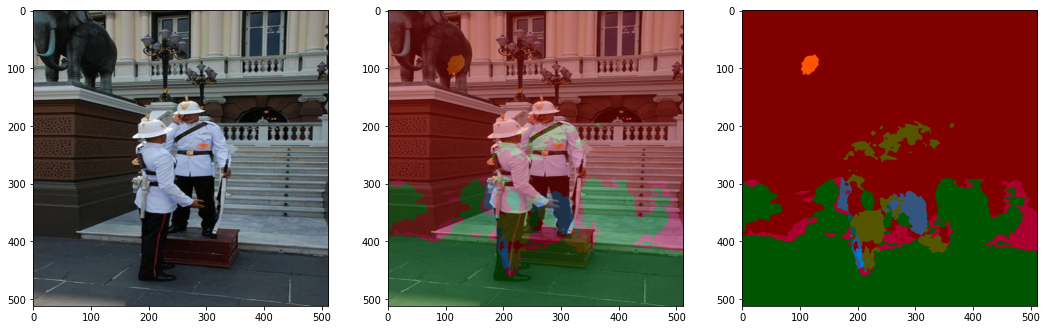

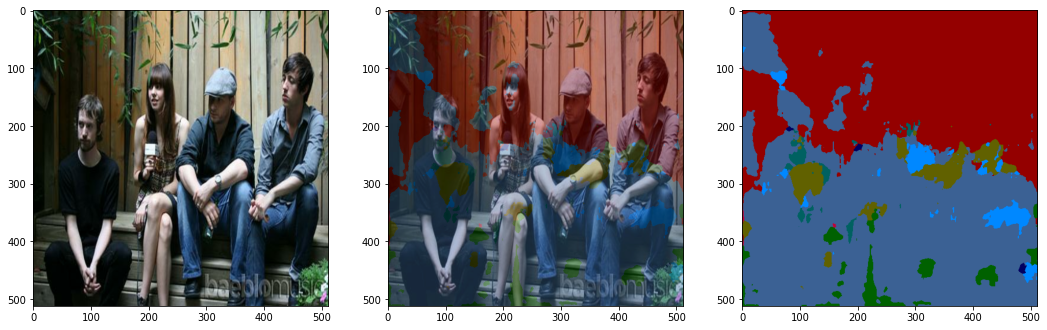

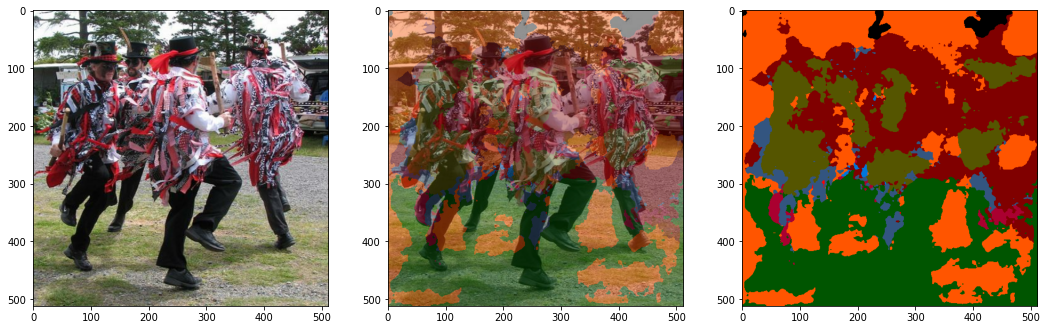

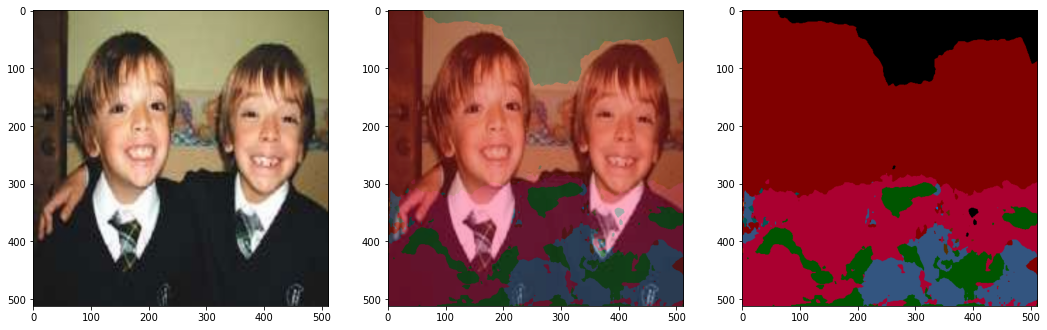

In [44]:
plot_predictions(
    train_images[:4], (
        config['train_dataset_configs']['height'],
        config['train_dataset_configs']['height']
    ), colormap
)

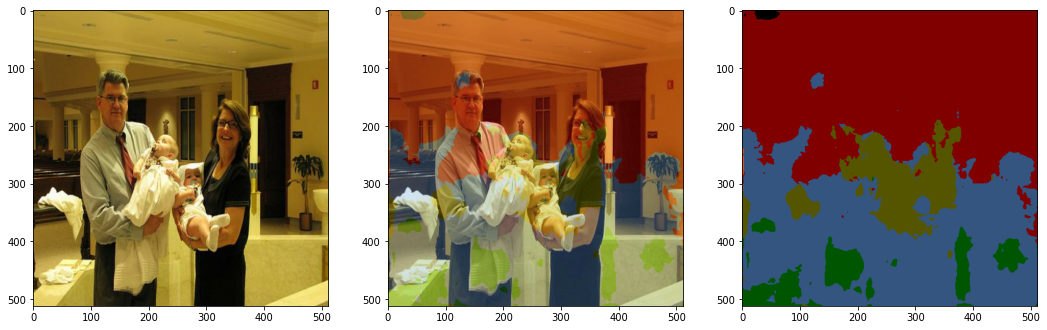

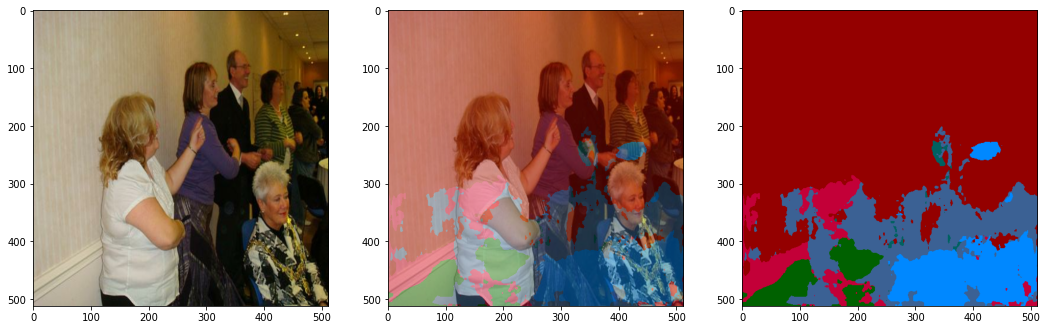

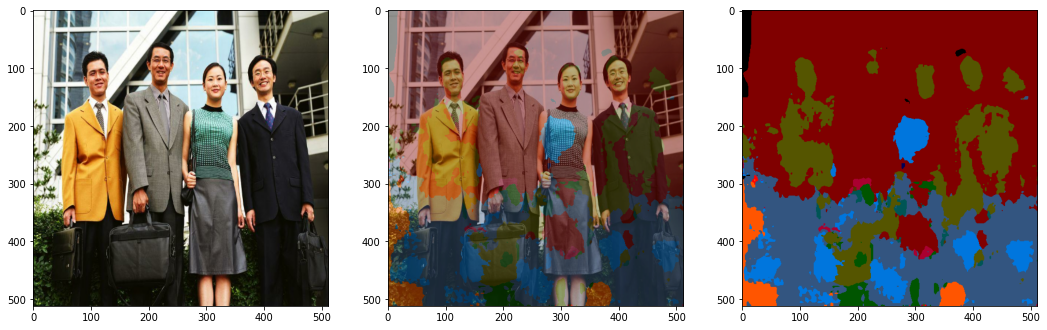

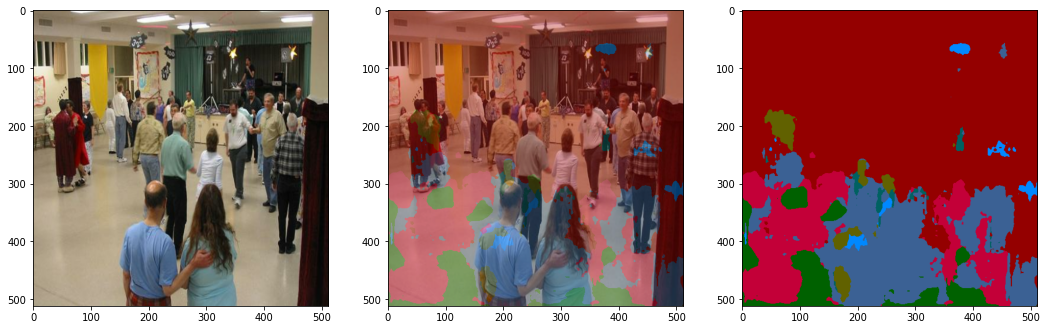

In [45]:
plot_predictions(
    val_images[:4], (
        config['val_dataset_configs']['height'],
        config['val_dataset_configs']['height']
    ), colormap
)

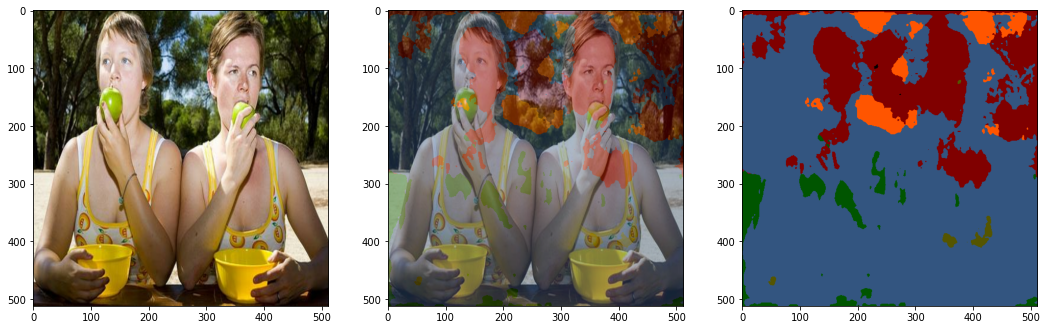

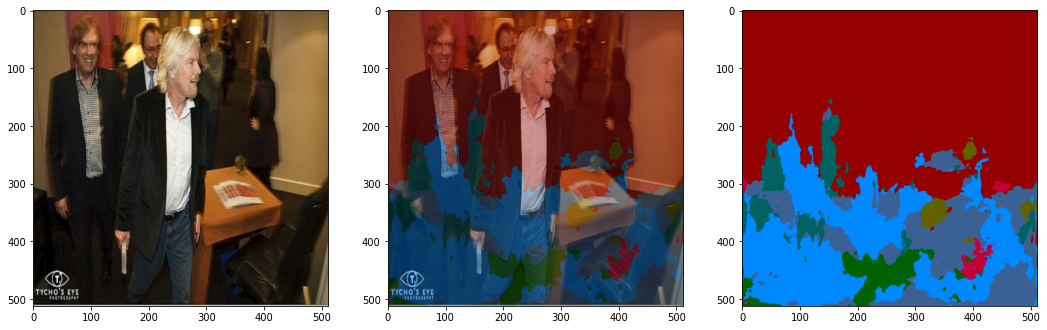

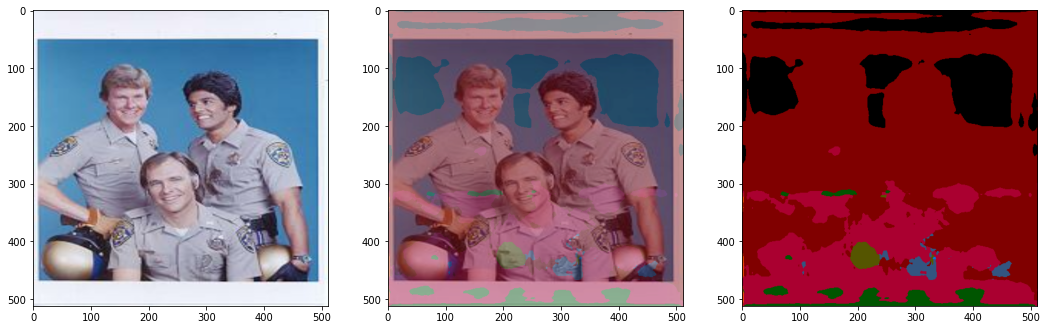

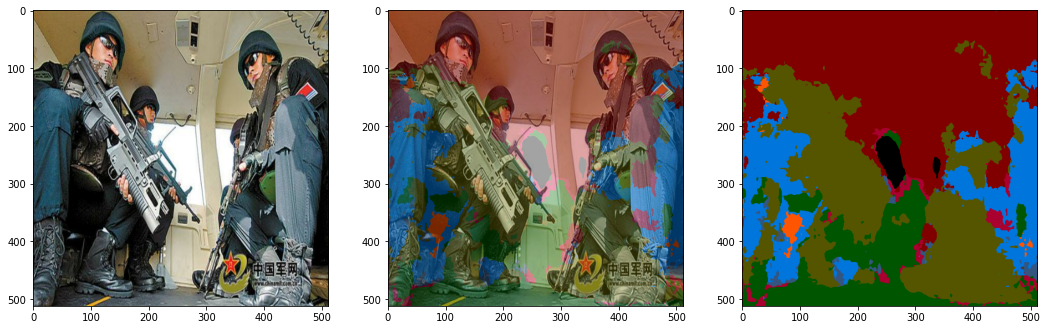

In [46]:
plot_predictions(
    test_images[:4], (
        config['val_dataset_configs']['height'],
        config['val_dataset_configs']['height']
    ), colormap
)